<a href="https://colab.research.google.com/github/orsan123/Database-and-analytics/blob/main/DBAS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

file = '/content/greenfuture_ideas_dataset.csv'
df = pd.read_csv(file)

#diplaying the first few rows
df.head()


,EmployeeID,OfficeLocation,Department,IdeaSubmissionDate,IdeaTitle,IdeaCategory,NumberofVotes,CollaborationStatus,ApprovalStatus,ImplementationStatus,SecurityConcernFlag
0,587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Pending,Not Started,No
1,0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No
2,fa012fe7,France,Environmental Policy,10/1/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes
3,cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No
4,333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No


In [ ]:
import sqlite3

# Create in-memory SQL DB
conn = sqlite3.connect(':memory:')
df.to_sql('ideas', conn, index=False, if_exists='replace')

# SELECT
pd.read_sql("SELECT * FROM ideas LIMIT 5;", conn)

# INSERT
conn.execute("INSERT INTO ideas ('EmployeeID', 'OfficeLocation', 'Department', 'IdeaSubmissionDate', 'IdeaTitle', 'IdeaCategory', 'NumberOfVotes', 'CollaborationStatus', 'ApprovalStatus', 'ImplementationStatus', 'SecurityConcernFlag') VALUES ('E3001', 'Dubai', 'Energy', '2025-04-01', 'Solar Paints', 'Renewable Energy', 20, 'Yes', 'Pending', 'Not Started', 'No');")

# UPDATE
conn.execute("UPDATE ideas SET 'ApprovalStatus' = 'Approved' WHERE 'EmployeeID' = 'E3001';")

# DELETE
conn.execute("DELETE FROM ideas WHERE 'EmployeeID' = 'E3001';")


In [1]:
install.packages("sqldf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(sqldf)

# Load dataset
df <- read.csv("/content/greenfuture_ideas_dataset.csv")

# 1. Total idea submissions per office
sqldf("SELECT OfficeLocation, COUNT(*) as total_ideas FROM df GROUP BY OfficeLocation ORDER BY total_ideas DESC")

# 2. Average number of votes per department
sqldf("SELECT Department, AVG(NumberofVotes) as avg_votes FROM df GROUP BY department ORDER BY avg_votes DESC")

# 3. Collaboration rate by office
sqldf("SELECT OfficeLocation,
              COUNT(*) as total,
              SUM(CASE WHEN CollaborationStatus = 'Yes' THEN 1 ELSE 0 END)*100.0/COUNT(*) as collab_percent
       FROM df
       GROUP BY OfficeLocation")

# 4. Approval rate of ideas with/without security concerns
sqldf("SELECT SecurityConcernFlag,
              COUNT(*) as total,
              SUM(CASE WHEN ApprovalStatus = 'Approved' THEN 1 ELSE 0 END)*100.0/COUNT(*) as approval_percent
       FROM df GROUP BY SecurityConcernFlag")


Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite



OfficeLocation,total_ideas
<chr>,<int>
China,280
France,266
South Africa,260
Japan,259
UK,257
Germany,252
Canada,252
Australia,244
USA,241


Department,avg_votes
<chr>,<dbl>
Environmental Policy,252.9259
Urban Development,250.7551
Research,248.5803
Technology,248.0460
Renewable Energy,246.6316
Infrastructure,243.6892


OfficeLocation,total,collab_percent
<chr>,<int>,<dbl>
Australia,244,0
Brazil,227,0
Canada,252,0
China,280,0
France,266,0
Germany,252,0
India,222,0
Japan,259,0
Mexico,240,0


SecurityConcernFlag,total,approval_percent
<chr>,<int>,<dbl>
No,2733,34.83352
Yes,267,31.83521


In [3]:
library(dplyr)

# Filter: Only approved ideas
approved_ideas <- df %>% filter(ApprovalStatus == "Approved")

# Mutate: Add a new column 'high_votes' for ideas with more than 50 votes
df <- df %>% mutate(high_votes = ifelse(NumberofVotes > 50, "Yes", "No"))

# Summarise: Total ideas and average votes per category
df %>% group_by(IdeaCategory) %>% summarise(total = n(), avg_votes = mean(NumberofVotes))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




IdeaCategory,total,avg_votes
<chr>,<int>,<dbl>
Carbon Capture,478,249.1674
Circular Economy,496,245.7742
Renewable Energy,533,247.8480
Smart Cities,489,244.7526
Sustainable Transport,512,247.0312
Water Management,492,255.6382


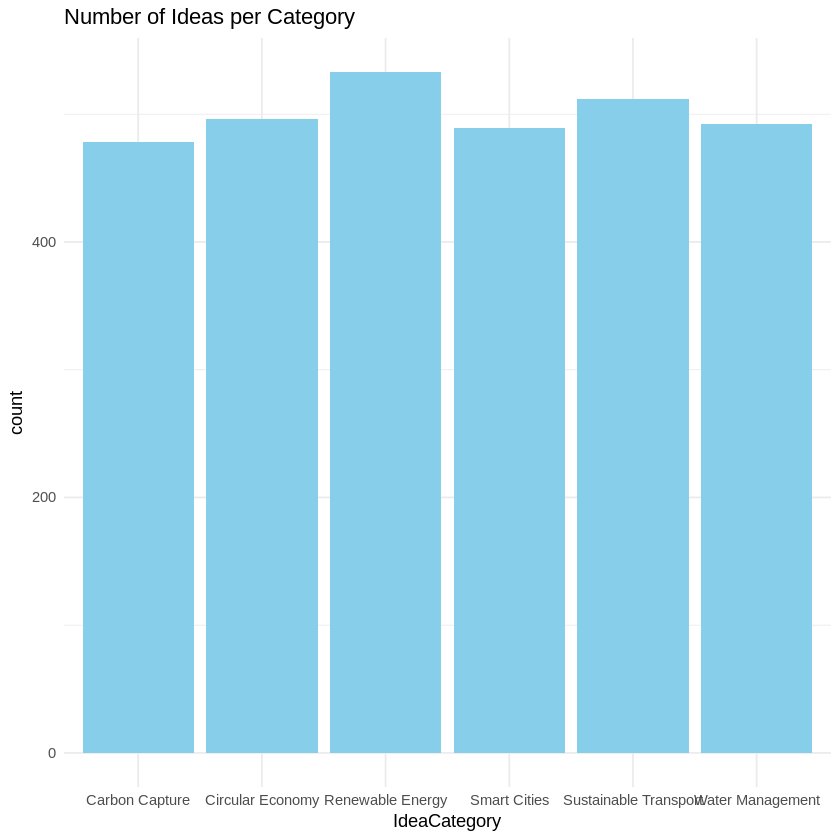

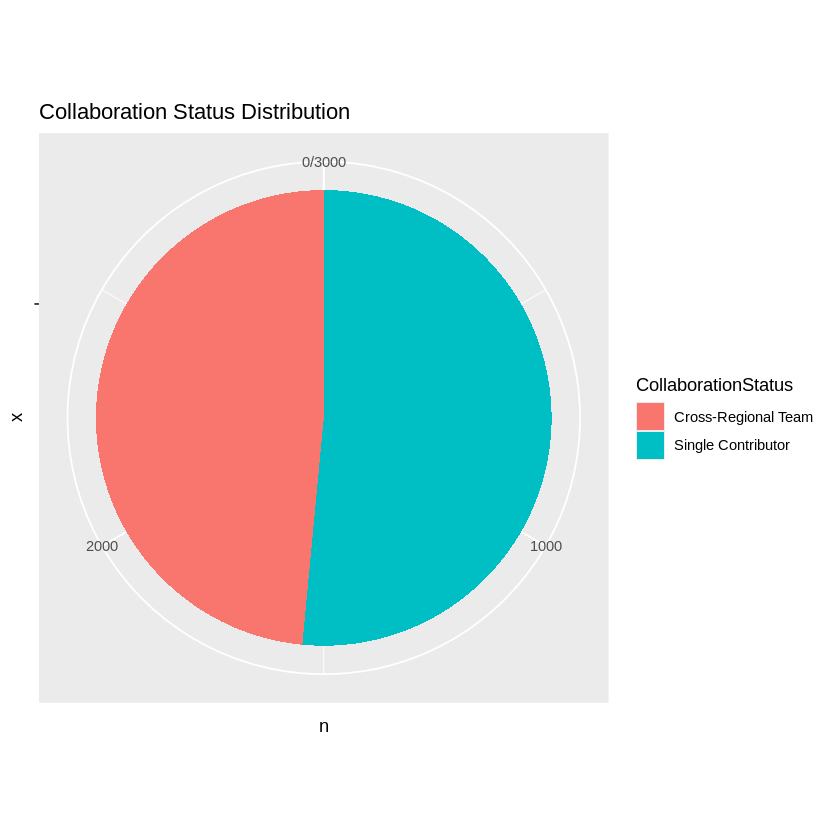

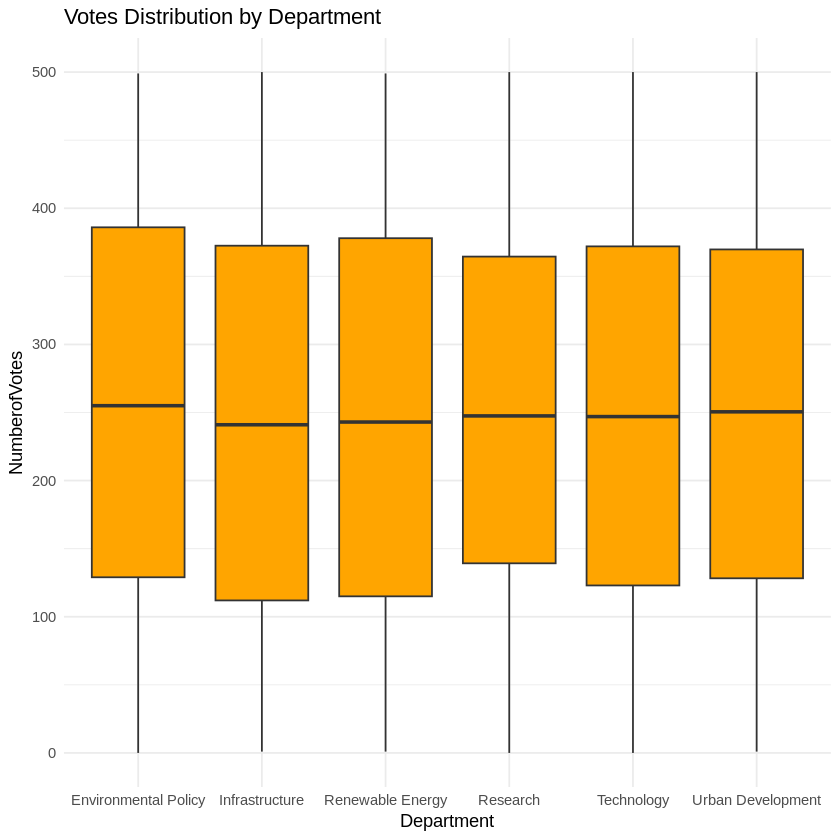

In [4]:
library(ggplot2)

# 1. Bar Plot: Ideas by Category
ggplot(df, aes(x = IdeaCategory)) +
  geom_bar(fill = "skyblue") +
  theme_minimal() +
  labs(title = "Number of Ideas per Category")

# 2. Pie Chart: Collaboration Status Distribution
df %>%
  count(CollaborationStatus) %>%
  ggplot(aes(x = "", y = n, fill = CollaborationStatus)) +
  geom_col(width = 1) +
  coord_polar("y") +
  labs(title = "Collaboration Status Distribution")

# 3. Box Plot: Votes Distribution by Department
ggplot(df, aes(x = Department, y = NumberofVotes)) +
  geom_boxplot(fill = "orange") +
  theme_minimal() +
  labs(title = "Votes Distribution by Department")
